By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_

Load the `trips` data into a dataframe.  

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trips = pd.read_csv('data/trips.csv')
trips.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many observations are there?

In [3]:
len(trips)

144015

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [4]:
trips.columns = trips.columns.str.lower()
trips.columns = trips.columns.str.replace(' ','_')
trips.columns = trips.columns.str.replace('#','num')
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many types of subscription options are there?

In [5]:
#trips.groupby('subscription_type').count()
trips['subscription_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

What is the frequency of each subscription option?

In [6]:
trips.subscription_type.value_counts().div(len(trips))

Subscriber    0.789133
Customer      0.210867
Name: subscription_type, dtype: float64

Please plot the frequency of each subscription option with pie chart:

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline  

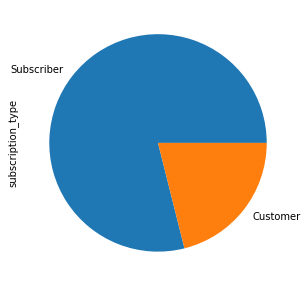

In [8]:
plot = trips.subscription_type.value_counts().plot.pie(figsize=(5, 5))

Please plot the frequency of each subscription option with bar chart:

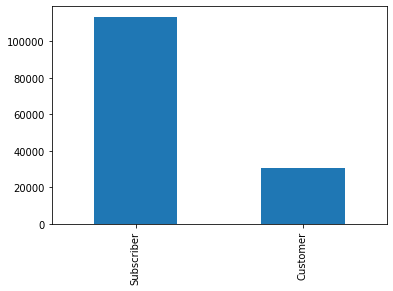

In [9]:
plot = trips.subscription_type.value_counts().plot.bar()

Repeat same analysis for start_station but sorted from high to low.

In [10]:
trips.start_station.value_counts().div(len(trips)).sort_values(ascending = False)

San Francisco Caltrain (Townsend at 4th)         0.068312
Harry Bridges Plaza (Ferry Building)             0.050988
Embarcadero at Sansome                           0.045447
Market at Sansome                                0.041121
Temporary Transbay Terminal (Howard at Beale)    0.035503
                                                   ...   
Franklin at Maple                                0.000687
Broadway at Main                                 0.000312
Redwood City Public Library                      0.000306
San Jose Government Center                       0.000160
Mezes Park                                       0.000021
Name: start_station, Length: 69, dtype: float64

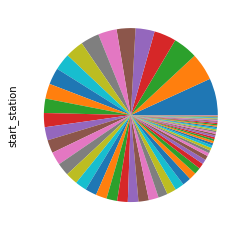

In [11]:
plot = trips.start_station.value_counts().div(len(trips)).sort_values(ascending = False).plot.pie(labels=None)

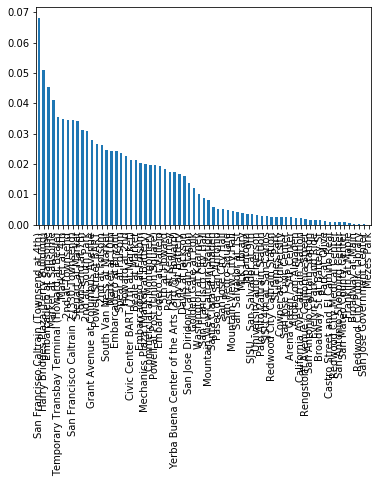

In [12]:
plot = trips.start_station.value_counts().div(len(trips)).sort_values(ascending = False).plot.bar()

Repeat same analysis for end_station but sorted from __low to high__.

In [13]:
trips.end_station.value_counts().div(len(trips)).sort_values()

Mezes Park                                  0.000035
San Jose Government Center                  0.000160
Broadway at Main                            0.000389
Franklin at Maple                           0.000646
San Antonio Shopping Center                 0.000646
                                              ...   
2nd at Townsend                             0.039267
Market at Sansome                           0.043315
Harry Bridges Plaza (Ferry Building)        0.051904
Embarcadero at Sansome                      0.052703
San Francisco Caltrain (Townsend at 4th)    0.080804
Name: end_station, Length: 69, dtype: float64

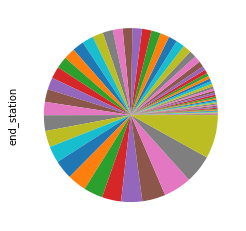

In [14]:
plot = trips.end_station.value_counts().div(len(trips)).sort_values().plot.pie(labels=None)

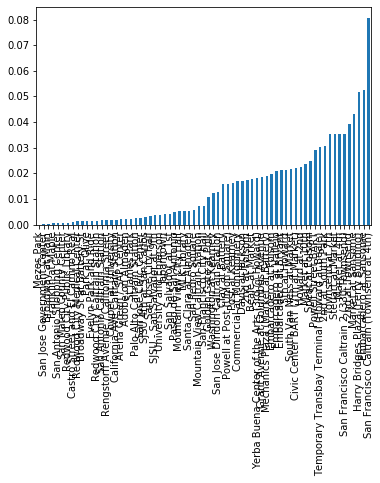

In [15]:
plot = trips.end_station.value_counts().div(len(trips)).sort_values().plot.bar()

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

    they are the same

Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

In [16]:
pd.crosstab(trips.start_station, trips.subscription_type).head()

subscription_type,Customer,Subscriber
start_station,,
2nd at Folsom,427,3349
2nd at South Park,535,3923
2nd at Townsend,882,4105
5th at Howard,606,2029
Adobe on Almaden,75,260


-----

Let's look at duration....

How long is the shortest trip? How many are that short?

In [17]:
print('shortest trip: ' + str(trips.duration.min()))
print('count of shortest trips: ' + str(len(trips[trips['duration'] == trips.duration.min()])))

shortest trip: 60
count of shortest trips: 17


What do you think is going on with the shrort trips?

    seems like the minimun time to rent a bike is one hour.

What is the longest trip? How many trips are "long"?

In [18]:
print('shortest trip: ' + str(trips.duration.max()))
print('count of shortest trips: ' + str(len(trips[trips['duration'] == trips.duration.max()])))
print(trips.duration.describe())

shortest trip: 722236
count of shortest trips: 1
count    144015.000000
mean       1230.910141
std        6652.962329
min          60.000000
25%         349.000000
50%         531.000000
75%         797.000000
max      722236.000000
Name: duration, dtype: float64


Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

    Seems like someones bike was stolen and it took some time until it was reported

Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

## How long is the average duration for customer and subscriber

In [19]:
trips[trips['subscription_type'] == 'Customer'].duration.mean()

3629.5196588514227

In [20]:
trips[trips['subscription_type'] == 'Subscriber'].duration.mean()

589.9695636488425

In [21]:
bins = pd.cut(trips['duration'], bins = 15, labels=range(15))
bins.name = 'duration_bins'
trips_joined = trips.join(bins)
trips_joined.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code,duration_bins
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,0
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,0
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,0
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,0
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,0


In [22]:
trips_joined.duration_bins.value_counts()

0     143693
1        258
5         16
2         16
3         15
4          8
6          4
12         3
14         1
8          1
13         0
11         0
10         0
9          0
7          0
Name: duration_bins, dtype: int64

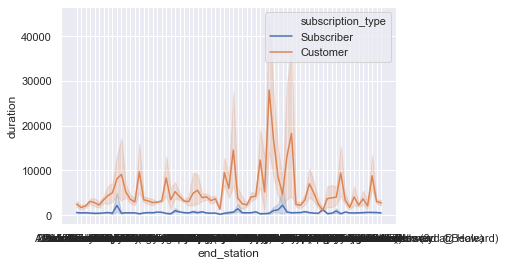

In [23]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
sns.lineplot(x='end_station',y="duration", hue="subscription_type", data=trips_joined)

-----
Challenge Exercises
-----

Plot duration

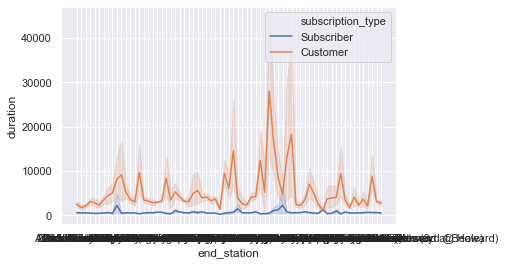

In [24]:
sns.lineplot(x='end_station',y="duration", hue="subscription_type", data=trips_joined)

Does that plot give insights?

    Yes, we see that subscriber rent a bike for an average shorter time than customers.

Select subsections of the data to make a series of plots to enable insights for the Product Team

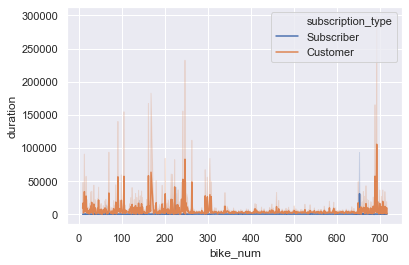

In [25]:
sns.lineplot(x='bike_num',y="duration", hue="subscription_type", data=trips_joined)

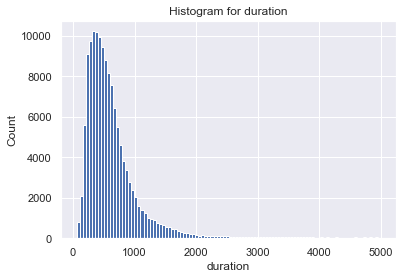

In [26]:
plt.xlabel('duration')
plt.ylabel('Count')
plt.title('Histogram for duration')
trips[trips['duration'] < 5000].duration.hist(bins=100)

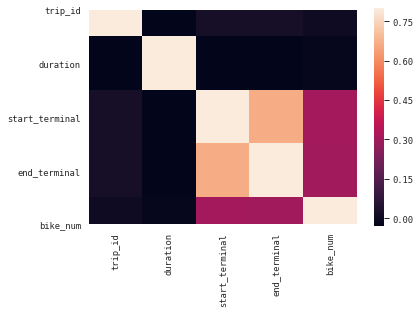

In [27]:
sns.set(context="paper", font="monospace")
corrmat = trips.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

In [28]:
trips['start_station'].replace(' ', '_', regex=True, inplace=True)
trips['end_station'].replace(' ', '_', regex=True, inplace=True)
trips['start_station'] = trips['start_station'].str.lower()
trips['end_station'] = trips['end_station'].str.lower()
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,south_van_ness_at_market,66,8/29/2013 14:14,south_van_ness_at_market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,san_jose_city_hall,10,8/29/2013 14:43,san_jose_city_hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,mountain_view_city_hall,27,8/29/2013 10:17,mountain_view_city_hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,san_jose_city_hall,10,8/29/2013 11:30,san_jose_city_hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,south_van_ness_at_market,66,8/29/2013 12:04,market_at_10th,67,319,Subscriber,94103


<br>
<br> 
<br>

----